# 動態網頁爬蟲 - 使用 Selenium

* 了解 Selenium 用於動態網頁爬蟲的原理
* 能夠使用 Selenium 撰寫動態網頁爬蟲

## 作業目標


* 根據範例使用 selenuim 取出 高雄市小港區 2019 年 空氣品質 資料，並用一個適合的資料結構儲存
* Hint: 將所有資料存在一個變數當中



In [4]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup

browser = webdriver.Chrome(executable_path='chromedriver')
browser.get("https://airtw.epa.gov.tw/")
#  改版了
selectSite = Select(browser.find_element_by_id("ddl_county"))
#選縣市
selectSite.select_by_value('Kaohsiung')
#高雄
selectYear = Select(browser.find_element_by_id("ddl_site"))
selectYear.select_by_value('10')
#小港


![](https://imgur.com/LwGGT8c.jpg)

這個網站更新了   
做得好漂亮XD
https://airtw.epa.gov.tw/
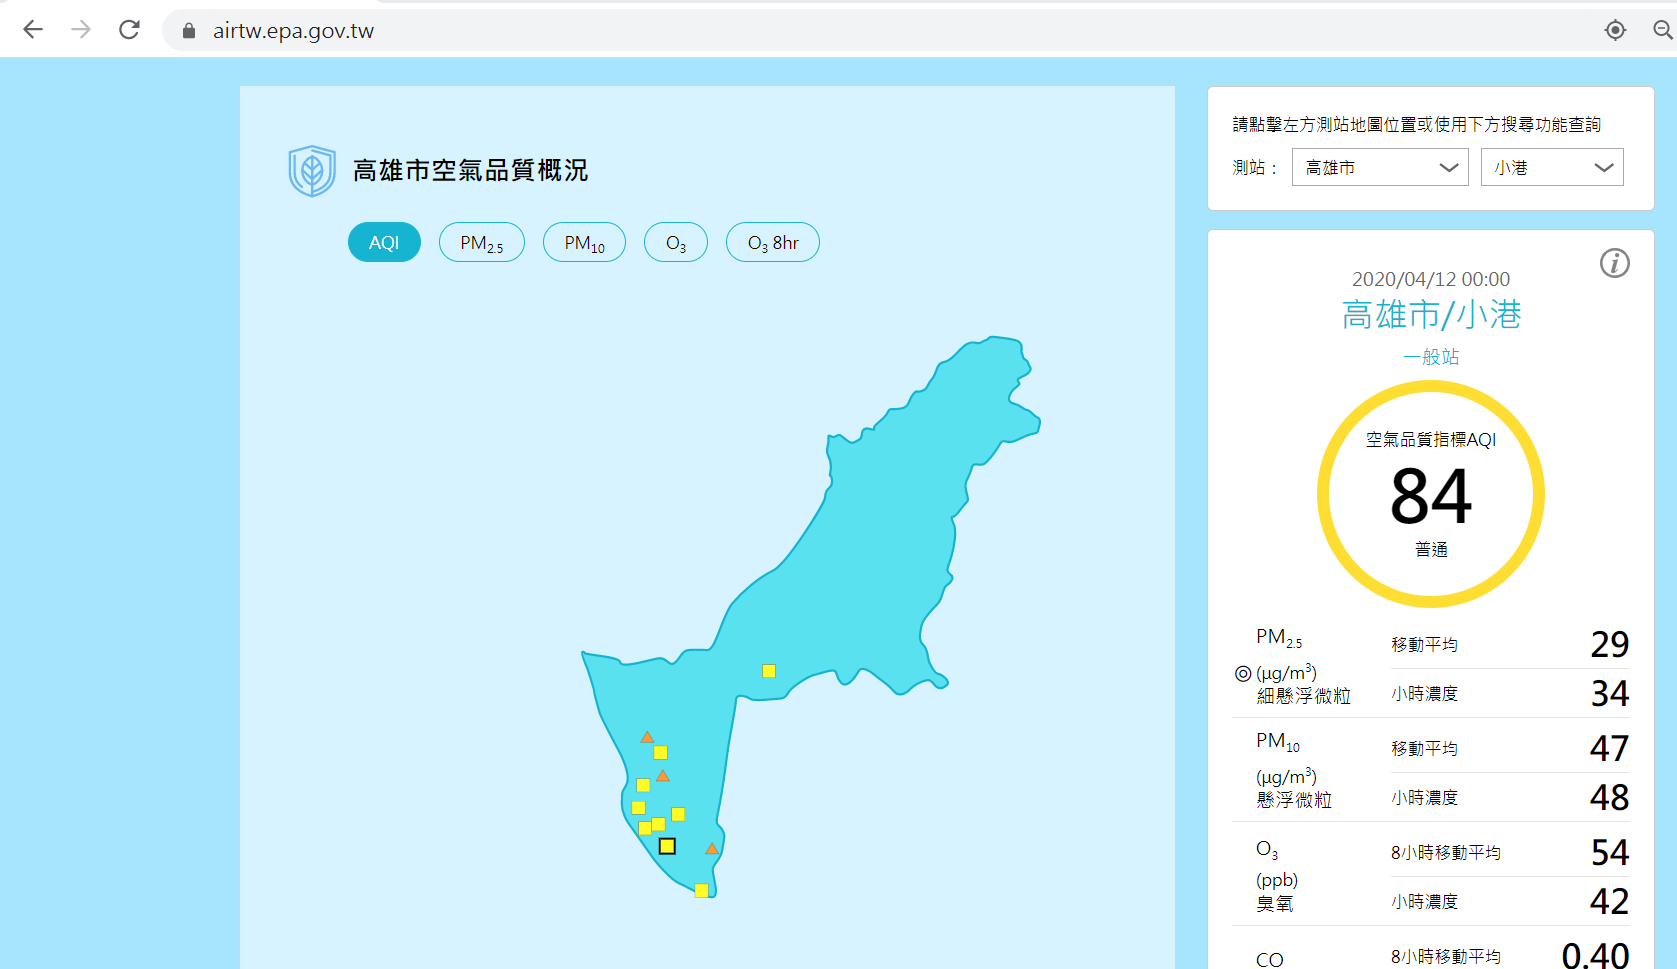

In [5]:
# 取得資料（等瀏覽器資料出現後才執行）
html_source = browser.page_source
html_source

'<!DOCTYPE html><!--[if lt IE 7 ]> <html class="ie ie6 no-js" lang="zh-Hant-TW"> <![endif]--><!--[if IE 7 ]>    <html class="ie ie7 no-js" lang="zh-Hant-TW"> <![endif]--><!--[if IE 8 ]>    <html class="ie ie8 no-js" lang="zh-Hant-TW"> <![endif]--><!--[if IE 9 ]>    <html class="ie ie9 no-js" lang="zh-Hant-TW"> <![endif]--><!--[if gt IE 9]><!--><html xmlns="http://www.w3.org/1999/xhtml" class=" js flexbox flexboxlegacy canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers applicationcache svg inlinesvg smil svgclippaths" lang="zh-Hant-TW" style=""><!--<![endif]--><head><meta charset="UTF-8" /><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" /><

In [20]:
soup = BeautifulSoup(html_source, 'html.parser')
info = soup.find('div', class_='info')
info

<div class="info">
<div class="date">2020/04/12 00:00<h4>高雄市/小港<span>一般站</span></h4></div>
<div data-aqi="84" id="aqicircle" style="border-color: rgb(255, 222, 51);">
<div>
                                            空氣品質指標AQI
                                                <b class="aquval">84</b>
<span class="aqitxt">普通</span>
</div>
</div>
<ul class="allif">
<li class="tag">
<b>PM<sub>2.5</sub><br/>
<span>(μg/m<sup>3</sup>)</span>細懸浮微粒</b>
<ul>
<li class="tag">
<b>移動平均</b>
<span id="AVPM25">29</span>
</li>
<li class="">
<b>小時濃度</b>
<span id="PM25">34</span>
</li>
</ul>
</li>
<li class="">
<b>PM<sub>10</sub><span>(μg/m<sup>3</sup>)</span>懸浮微粒</b>
<ul>
<li class="tag">
<b>移動平均</b>
<span id="AVPM10">47</span>
</li>
<li class="">
<b>小時濃度</b>
<span id="PM10">48</span>
</li>
</ul>
</li>
<li class="">
<b>O<sub>3</sub><span>(ppb)</span>臭氧</b>
<ul>
<li class="tag">
<b>8小時移動平均</b>
<span id="AVO3">54</span>
</li>
<li class="">
<b>小時濃度</b>
<span id="O3">42</span>
</li>
</ul>
</li>
<li class="">

In [29]:
info_dict = dict({})
for d in info:
    date=d.find_all('div', class_='date')
    AVPM25=d.find('span', id_='AVPM25')
    PM25=d.find('span', id_='PM25')
    AVPM10=d.find('span', id_='AVPM10')
    PM10=d.find('span', id_='PM10')
    AVO3=d.find('span', id_='AVO3')
    O3=d.find('span', id_='O3')
    AVCO=d.find('span', id_='AVCO')
    CO=d.find('span', id_='CO')
    SO2=d.find('span', id_='SO2')
    NO2=d.find('span', id_='NO2')
    info_dict[date]=[AVPM25,PM25,AVPM10,PM10,AVO3,O3,AVCO,CO,SO2,NO2]

AttributeError: 'NavigableString' object has no attribute 'find_all'

In [30]:

import pandas as pd
pd.DataFrame(d)

ValueError: DataFrame constructor not properly called!